In [152]:
import DownloadData_v4
import datetime as dt
import matplotlib.pyplot as plt 

import numpy as np
import pandas as pd

from jinja2 import Environment, FileSystemLoader #for html report  

pd.set_option('display.max_rows', 200) #https://stackoverflow.com/questions/16424493/pandas-setting-no-of-max-rows
pd.options.display.max_rows 
#pd.set_option('display.max_columns', 60) #https://stackoverflow.com/questions/16424493/pandas-setting-no-of-max-rows
pd.options.display.max_columns = None

## download data 1970 to today,  CPI, CPIcore, Dow, FedFunds, 2yrs , dollarmark since EURusd didnt exists

In [80]:
data = ['CPI YOY Index','CPI XYOY Index', 'INDU Index', 'FDTR Index', 'USGG2YR Index', 'USDDEM Curncy']
data_objs = []
for count in range(len(data)):#count is 0 to n
    data_objs.append('')#initialize list
    data_objs[count] = DownloadData_v4.DownloadData(pair = data[count],\
                                            fields = ['PX_LAST'], startDate = dt.datetime(1970,1,2),\
                                            endDate = dt.datetime.today(), period = 'MONTHLY', source = 'blp')
    
data_ = {}
count = 0
for pair in data:
    data_[pair] = []#initialize dictionary
    data_[pair] = data_objs[count].get_data_blp_historical(1) #if 0, columns is MultiIndex([('AUDUSD Curncy', 'AUDUSD Curncy')]) and then issue wont loop inside and calc MAs
           
    count += 1
    #print(df_asia_dailies)
df_= pd.concat([data_[i] for i in data_], join = 'outer', axis = 1, keys =data_).interpolate(method = 'linear')
    

df_['CPI_rets'] = df_['CPI YOY Index'] - df_['CPI YOY Index'].shift(1)
df_['INDU_rets'] = np.log(df_['INDU Index']/df_['INDU Index'].shift(1))
df_['FDTR_rets'] = df_['FDTR Index']-df_['FDTR Index'].shift(1)
df_['USDDem_rets'] = np.log(df_['USDDEM Curncy']/df_['USDDEM Curncy'].shift(1))

#create grouper object to see yearly changes
df2 = df_.iloc[:,-4:].groupby(pd.Grouper(freq = 'Y'))  #.cumsum()
df3 = df2.sum()

2022-09-19 17:14:59.077251
2022-09-19 17:14:59.077251
2022-09-19 17:14:59.077251
2022-09-19 17:14:59.077251
2022-09-19 17:14:59.077251
2022-09-19 17:14:59.077251


In [150]:
#inspect
df_.columns

MultiIndex([( 'CPI YOY Index', 'PX_LAST'),
            ('CPI XYOY Index', 'PX_LAST'),
            (    'INDU Index', 'PX_LAST'),
            (    'FDTR Index', 'PX_LAST'),
            ( 'USGG2YR Index', 'PX_LAST'),
            ( 'USDDEM Curncy', 'PX_LAST'),
            (      'CPI_rets',        ''),
            (     'INDU_rets',        ''),
            (     'FDTR_rets',        ''),
            (   'USDDem_rets',        '')],
           )

## chart over couple of periods 

In [145]:
def line_and_bar(y_line, y_bar, x,  y_line2, y_line3):
    '''
    draws one chart with line and bar ...and a 2nd one with 2 lines 
    y_line: dataframe column we want line chart eg df['timeseries'],
    y_bar dataframe column we want bar chart eg df['other_timeseries']
    x use df.loc[].index on datetime object for time frame
    
    y_line2  stonks
    y_line3   fx
    
    '''
    fig, ax1 = plt.subplots(figsize = (15,10))

    print(x)
    ax1.plot(x, y_line.loc[x], '-b', lw = 2)  #setup line plot
    ax1.set_ylabel('FDTR')
    ax1.set_ylim(0,21)
    ax1.legend(['FDTR'], loc = 'upper left')

    ax2 = ax1.twinx()
    ax2.bar(x, y_bar.loc[x].values.reshape(len(df_.loc[x])),\
            width = 15, alpha = 1, color = 'orange')  #setup bar plot...y needs to be series

    ax2.grid(True)
    ax2.set_ylabel('CPI')
    ax2.set_ylim(0,21)  
    ax2.legend('CPI', loc = 'upper right')
    
    plt.grid(True)
    
    ##2nd plot setting starts here
    
    fig, ax1 = plt.subplots(figsize = (15,10))
    plt.subplot(212) 
    
    plt.plot(y_line2.loc[x], 'g', lw = 1.5 , label = 'stonks')
    plt.legend(loc='upper left')
    
    plt.twinx().plot(y_line3.loc[x], 'r', label = 'dolly')
    plt.legend('usd', loc = 'best')
    
    
    plt.grid(True)
    
    plt.show()

DatetimeIndex(['1970-01-30', '1970-01-31', '1970-02-27', '1970-02-28',
               '1970-03-31', '1970-04-30', '1970-05-29', '1970-05-31',
               '1970-06-30', '1970-07-31',
               ...
               '1986-06-30', '1986-07-31', '1986-08-29', '1986-08-31',
               '1986-09-30', '1986-10-31', '1986-11-28', '1986-11-30',
               '1986-12-31', '1987-01-30'],
              dtype='datetime64[ns]', name='date', length=263, freq=None)


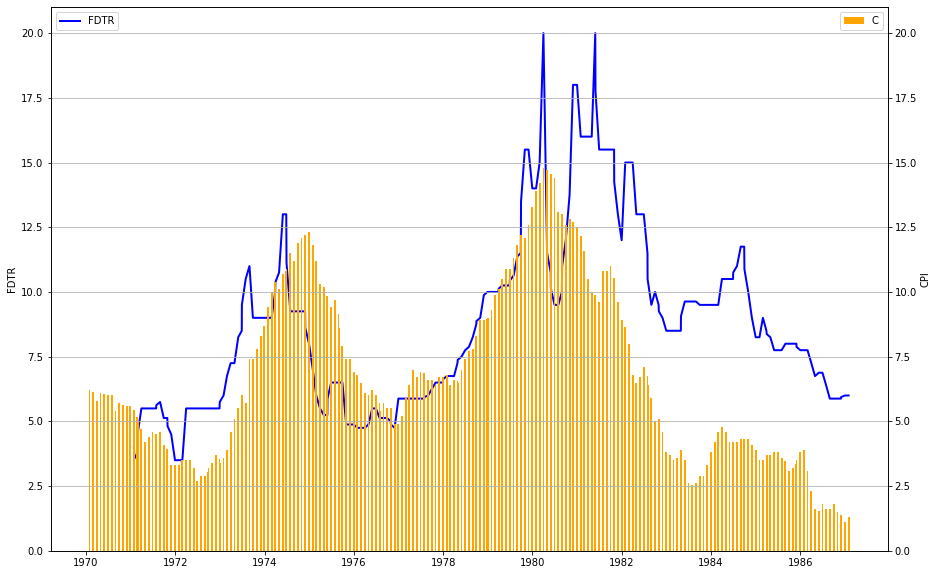

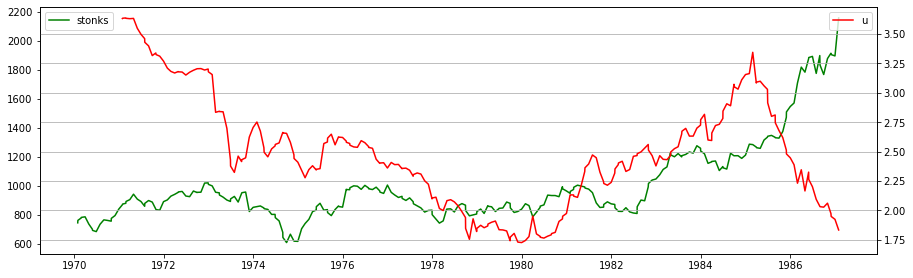

In [143]:
line_and_bar(df_['FDTR Index'], df_['CPI YOY Index'],\
             df_['1970-01-30':'1987-01-30'].index, \
            df_['INDU Index'], \
            df_['USDDEM Curncy'])

#### 1970 -> 1980 the well known lost decade in stonks, wide range [600,1000], troughs aroud inflation and FDTR peaks, violent rallies from lows >30%

#### USD secular downtrend with snaps on tighteningss , turnaroudn ony occured in 1980s lasting till plaza accord?

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-04-30', '2000-05-31', '2000-06-30', '2000-07-31',
               '2000-08-31', '2000-09-29',
               ...
               '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31',
               '2022-04-29', '2022-04-30', '2022-05-31', '2022-06-30',
               '2022-07-29', '2022-07-31'],
              dtype='datetime64[ns]', name='date', length=348, freq=None)


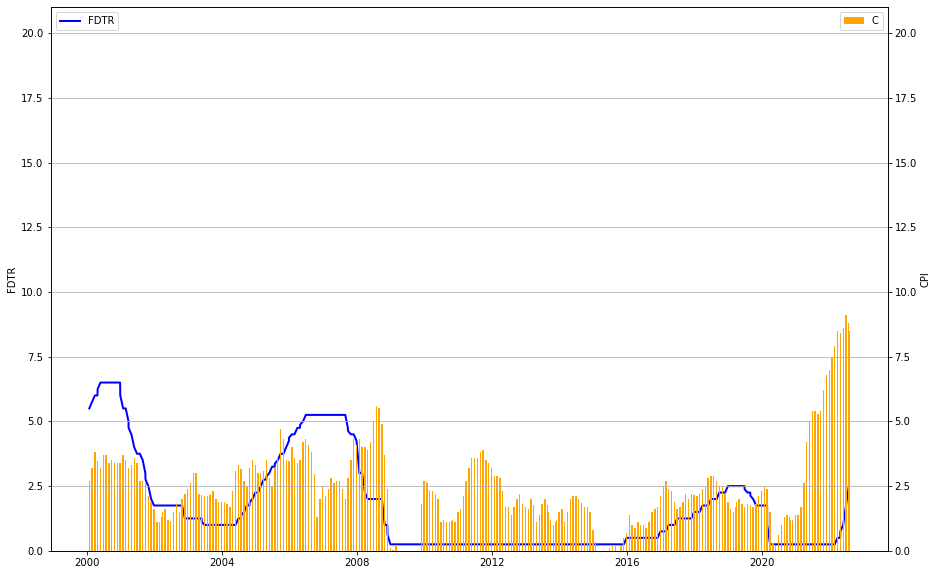

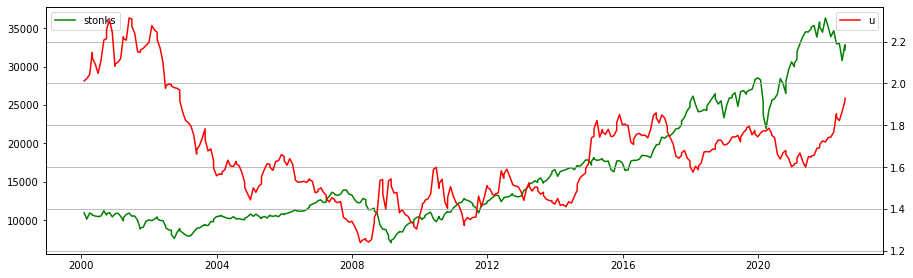

In [146]:
line_and_bar(df_['FDTR Index'], df_['CPI YOY Index'], df_['2000-01-30':'2022-08-30'].index,\
            df_['INDU Index'],\
             df_['USDDEM Curncy'])

#### 2000 to 2010 recover from NQ bubble burst into GFC....then the bubble-in-everything  till 2021 ...

#### 2000 to 2008 dolly outflows (twin deficit narrative, BRIC booming etc)..2008 crisis (delever) onwards, choppy uptrend esp > 2014 as FED was main one tightening, FANGS boom, BRICs stalling..

In [94]:
#sanity check in 1998 did Dow really go up (it did in spite of crisis)
#df_.loc['1997-12-31':'1998-12-31']

In [116]:
df4 = pd.merge(df3, df_['CPI YOY Index'], how = 'inner', left_index = True, right_index = True)
df4.columns = ['CPI_change', 'Dow_change', 'FedFunds_change', 'USD_change', 'CPI_level']
df4

C:\Users\cp85vc\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:618: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


,CPI_change,Dow_change,FedFunds_change,USD_change,CPI_level
date,,,,,
1970-12-31,-0.6,0.119994,0.000,0.000000,5.6
1971-12-31,-2.3,0.059331,-0.500,-0.105079,3.3
1972-12-31,0.1,0.125784,2.250,-0.028169,3.4
1973-12-31,5.3,-0.170983,3.250,-0.161250,8.7
1974-12-31,3.6,-0.322611,-1.000,-0.115604,12.3
1975-12-31,-5.4,0.324431,-3.120,0.083675,6.9
1976-12-31,-2.0,0.164327,1.000,-0.104390,4.9
1977-12-31,1.8,-0.227102,0.745,-0.114502,6.7
1978-12-31,2.3,0.026588,3.375,-0.130952,9.0


In [117]:
'''what expect (ignore CPI_level) 
when cpi accellerating, stonks fall as expected tighten = True,  -21% correl
when cpi accellerating + , FDTR increasing = True,  +60% correl
wehn cpi accellerating, dolly should strenghten as FDTR increasing = False, -24%'''
df4.corr()

,CPI_change,Dow_change,FedFunds_change,USD_change,CPI_level
CPI_change,1.000000,-0.201862,0.592923,-0.261046,0.378859
Dow_change,-0.201862,1.000000,0.092316,0.065391,-0.216804
FedFunds_change,0.592923,0.092316,1.000000,-0.122589,0.291046
USD_change,-0.261046,0.065391,-0.122589,1.000000,-0.071571
CPI_level,0.378859,-0.216804,0.291046,-0.071571,1.000000
